# <b> Logistic Regression </b>
___

<b> Table of Content: </b>
<br> <b> [Pipeline_1](#8000) </b>
<br> [1.0 Basic Model: Logistic Regression](#800010)
<br> [1.1 Oversampling (SMOTE)](#800011)
<br> [1.2 Cross Validation (Oversampling)](#8000012)
<br> [1.3 Model Tuning (Hyperparameters)](#8000013)
<br> [1.4 Feature Importance](#8000014)
<br> <b> [Pipeline 2](#8010) </b>
<br> [2.0 Basic Model: Logistic Regression](#800020)
<br> [2.1 Oversampling (SMOTE)](#800021)
<br> [2.2 Cross Validation (Oversampling)](#8000022)
<br> [2.3 Model Tuning (Hyperparameters)](#8000023)
<br> [2.4 Feature Importance](#8000024)
<br> <b> [Pipeline 3](#8020) </b>
<br> [3.0 Basic Model: Logistic Regression](#800030)
<br> [3.1 Oversampling (SMOTE)](#800031)
<br> [3.2 Cross Validation (Oversampling)](#8000032)
<br> [3.3 Model Tuning (Hyperparameters)](#8000033)
<br> [3.4 Feature Importance](#8000034)
<br> <b> [Results](#800004) </b>

<b> Loading Modules

In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import oversampling and undersampling packages
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 

# Cross Validation packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import required modules for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import module for gridsearch (to find optimal hyper-parameters)
from sklearn.model_selection import GridSearchCV

# import module (to test execution time of a codeblock to run)
import time

import warnings

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [4]:
# packages for Receiver Operating Characteristic (ROC) with cross validation
# source: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_roc_crossval.html
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve

Automatically created module for IPython interactive environment


<a id = "8000"> <h2> Pipeline 1 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [3]:
df_pipeline1 = pd.read_csv("pipeline_1.csv")

<b> show all columns in dataset

In [4]:
print('There are', len(df_pipeline1.columns)-1, 'features, and the target `Revenue` for pipeline 1:')
list(df_pipeline1.columns)

There are 22 features, and the target `Revenue` for pipeline 1:


['Q4',
 'VisitorType_New_Visitor',
 'Q3',
 'TrafficType_2',
 'TrafficType_8',
 'TrafficType_3',
 'PageValues_iqr_yj_zscore',
 'Q1',
 'TrafficType_13',
 'ExitRates_iqr_yj_zscore',
 'OperatingSystems_3',
 'Administrative_Duration_iqr_yj_zscore',
 'TrafficType_1',
 'SpecialDay_0.8',
 'Month_Feb',
 'Browser_6',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Informational_Duration_pp_iqr_yj_zscore',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

<a id = "800010"> <h2> 1.0 Basic Model: Logistic Regression </h2> </a>

<b> Declare Features and Target

In [5]:
# Define Features and Target variables
X = df_pipeline1.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline1.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

<b> Split the data

In [6]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

<b> Model Development and Prediction

In [7]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict (y_hat) - use trained model to predict test data
y_pred=logreg.predict(X_test)

<b> Model Evaluation Using Confusion Matrix

In [8]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2942,  189],
       [ 240,  328]])

<b> Vizualizing Confusion Matrix Using Heatmap

In [9]:
%matplotlib inline
plt.style.use('ggplot')

Text(0.5,257.44,'Predicted label')

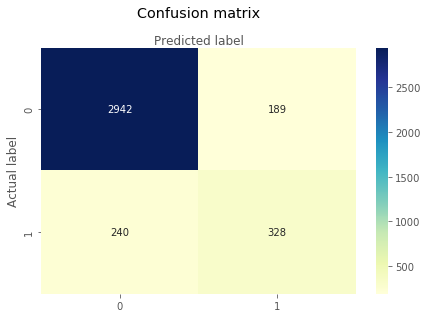

In [10]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<b> Classification report

In [11]:
# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3131
           1       0.63      0.58      0.60       568

    accuracy                           0.88      3699
   macro avg       0.78      0.76      0.77      3699
weighted avg       0.88      0.88      0.88      3699



In [12]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

<b> ROC Curve

In [13]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=logreg):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

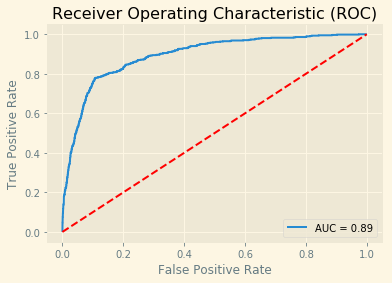

AUC score: 0.8939281649655197


In [14]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=logreg)

<a id = "800011"> <h2> 1.1 Oversampling (SMOTE) </h2> </a>

In [15]:
# Define Features and Target variables
X = df_pipeline1.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline1.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

In [16]:
sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 22)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
logreg1 = LogisticRegression()

logreg1.fit(X_train_res, y_train_res)
y_pred = logreg1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3131
           1       0.54      0.78      0.64       568

    accuracy                           0.87      3699
   macro avg       0.75      0.83      0.78      3699
weighted avg       0.89      0.87      0.87      3699



/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


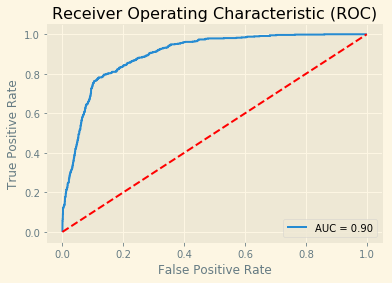

AUC score: 0.8998177021245969


In [18]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=logreg1)

<a id = "8000012"> <h2> 1.2 Cross Validation (Oversampling) </h2> </a>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<b> Accuracy

In [19]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
result = cross_val_score(logreg1, X_train_res, y_train_res, cv=kfold, scoring='accuracy')

print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Conclusion: the average of the accuracy changed after applying Kfold:')
print('--------------------------------------------------------------------------')
print('from:')
print(round(metrics.accuracy_score(y_test, y_pred), 5))
print('to:')
print(round(result.mean(), 5))
print('This is because we only use: {0:0.2f}% of our dataset to train the model!'.format(((k_fold_split-1)/k_fold_split)*100))

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.83276217 0.858122   0.84979424 0.86419753 0.83539095 0.85322359
 0.84910837 0.85939643 0.83813443 0.85802469] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8498 

--------------------------------------------------------------------------
Conclusion: the average of the accuracy changed after applying Kfold:
--------------------------------------------------------------------------
from:
0.86591
to:
0.84982
This is because we only use: 90.00% of our dataset to train the model!


<b> Weighted F1 score

In [20]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(logreg1, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.83270874 0.85780869 0.84966078 0.86419089 0.83502208 0.85299126
 0.84873746 0.85922155 0.8378981  0.8578576 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8496 



<b> ROC for oversampled training set (SMOTE) with cross validation (Kfold)

In [21]:
def roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=LogisticRegression(), user_defined_splits=10):
    # define two lists to write to for the true positive rate and the auc scores
    cv = StratifiedKFold(n_splits=user_defined_splits)
    tprs = []
    aucs = []
    
    # plot the line through the middle
    # Return evenly spaced numbers over a specified interval.
    mean_fpr = np.linspace(0, 1, 100)

    # set the figure and ax objects with the figure size
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # for loop to iterate over multiple folds
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    # print out the mean AUC score
    print('Mean AUC score', mean_auc)

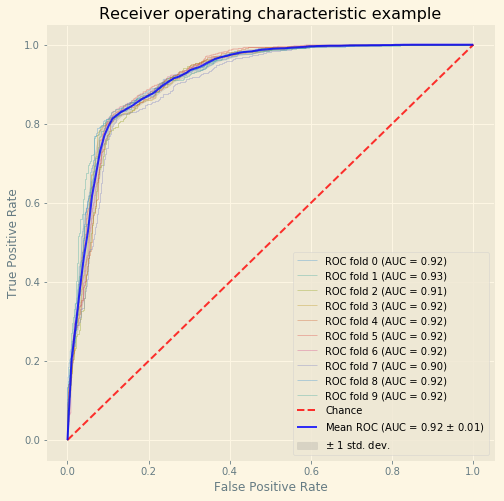

Mean AUC score 0.917316908928629


In [22]:
# ignore warnings
warnings.filterwarnings("ignore")

# apply function to plot ROC Curve with Kfold
roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=LogisticRegression(), user_defined_splits=10)

# reset the warnings for future code
warnings.resetwarnings()

<a id = "8000013"> <h2> 1.3 Model Tuning (Hyperparameters) </h2> </a>
___
To see the hyper-parameters of the Logistic Regression model, please refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
<br> _Note:_ The optimal hyper-parameter for: 'max_iter' was already found in pipeline 1 for RFE Feature selection using Logistic Regression, it was 53.

<b> Define Grid

In [23]:
# Set the hyper-parameter grid
penalty = ['l1', 'l2']
dual=[True, False]
# syntax: numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0) => Return numbers spaced evenly on a log scale.
C = np.logspace(-4, 4, 50)
fit_intercept=[True, False]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter=[53, 100]
multi_class = ['auto', 'ovr', 'multinomial']

param_grid = dict(penalty=penalty, 
                  dual=dual,max_iter=max_iter, 
                  C=C, 
                  fit_intercept=fit_intercept, 
                  solver=solver, 
                  multi_class=multi_class)

<b> Hyper-parameter tweaking on oversampled training set

In [24]:
# set the start time
start = time.time()

# define the model
lr = LogisticRegression()

# Create a grid search object
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_dual = grid.best_estimator_.get_params()['dual']
optimal_max_iter = grid.best_estimator_.get_params()['max_iter']
optimal_C = grid.best_estimator_.get_params()['C']
optimal_penalty = grid.best_estimator_.get_params()['penalty']
optimal_fit_intercept = grid.best_estimator_.get_params()['fit_intercept']
optimal_solver = grid.best_estimator_.get_params()['solver']
optimal_multi_class = grid.best_estimator_.get_params()['multi_class']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.851667 using {'C': 0.040949150623804234, 'dual': False, 'fit_intercept': True, 'max_iter': 53, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
--- Execution time: ---
--- 530583.807ms. --- 
--- 530.5838072299957 seconds ---
--- 8.843063453833262 minutes ---


Best: 0.851667 using {'C': 0.040949150623804234, 'dual': False, 'fit_intercept': True, 'max_iter': 53, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
<br>--- Execution time: ---
<br>--- 530583.807ms. --- 
<br>--- 530.5838072299957 seconds ---
<br>--- 8.843063453833262 minutes ---

<b> Applying the optimal hyper-parameters on oversampled training set

In [25]:
# apply the optimal hyper-parameters to the Logistic Regression Model
logreg3 = LogisticRegression(dual=optimal_dual, 
                            max_iter=optimal_max_iter, 
                            C=optimal_C, 
                            penalty=optimal_penalty, 
                            fit_intercept=optimal_fit_intercept, 
                            solver=optimal_solver, 
                            multi_class=optimal_multi_class)

# fit/train the model with oversampled training set
logreg3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=logreg3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3131
           1       0.55      0.78      0.65       568

    accuracy                           0.87      3699
   macro avg       0.75      0.83      0.78      3699
weighted avg       0.89      0.87      0.88      3699



<b> Average Weighted F1 score and Average AUC score with Cross validation

In [26]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(logreg3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(logreg3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.83681341 0.85775122 0.8544025  0.8648733  0.83362501 0.85299126
 0.85148769 0.85988465 0.83995021 0.8578576 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.851 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.90583473 0.92701177 0.9128403  0.92484213 0.90928614 0.91564946
 0.91743017 0.92134434 0.91021443 0.92040117] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9165 



<b> Cross validation on X and Y

In [27]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(logreg3, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(logreg3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(logreg3, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8911 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8898 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.9009


<a id = "8000014"> <h2> 1.4 Feature Importance </h2> </a>

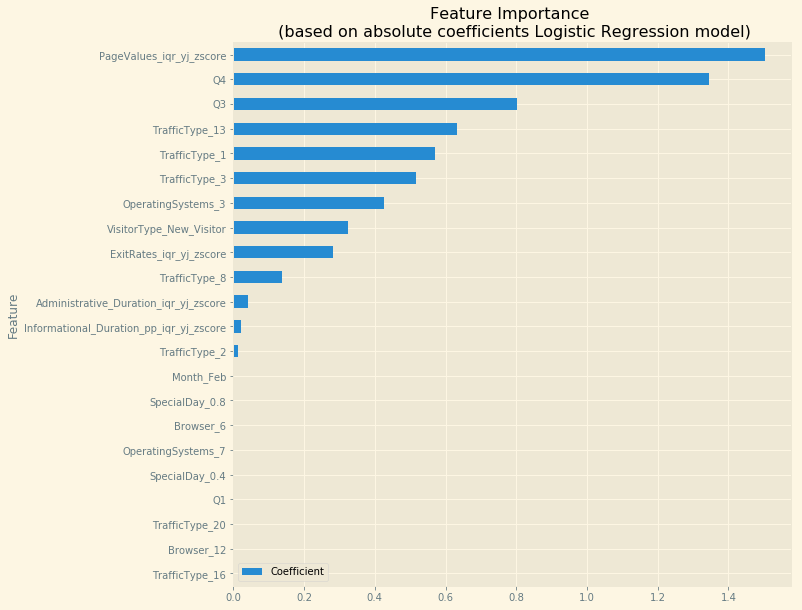

In [28]:
lst_coef=[]
lst_features=[]

for i in logreg3.coef_:
    for j in i:
        lst_coef.append(abs(j))
        
for j in list(X.columns):
        lst_features.append(j)

# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Coefficient": lst_coef}
df_coef = pd.DataFrame(dict_lists)
# sort descending and reset index
df_coef.sort_values(by=['Coefficient'],  ascending=True, inplace=True)
df_coef.reset_index(inplace=True, drop=True)
df_coef
df_coef.plot(x="Feature", y="Coefficient", kind='barh', figsize=(10,10), title='Feature Importance \n (based on absolute coefficients Logistic Regression model)')

<a id = "8010"> <h2> Pipeline 2 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [29]:
df_pipeline2 = pd.read_csv("pipeline_2.csv")

<b> show all columns in dataset

In [30]:
print('There are', len(df_pipeline2.columns)-1, 'features, and the target `Revenue` for pipeline 2:')
list(df_pipeline2.columns)

There are 21 features, and the target `Revenue` for pipeline 2:


['TrafficType_15',
 'Month_Nov',
 'Administrative_Duration_mm_yj_stdev',
 'VisitorType_New_Visitor',
 'Informational_mm_yj_stdev',
 'TrafficType_2',
 'TrafficType_3',
 'ProductRelated_mm_yj_stdev',
 'PageValues_mm_yj_stdev',
 'Month_May',
 'TrafficType_13',
 'OperatingSystems_3',
 'TrafficType_1',
 'add_exit_bounce_rates_mm_yj_stdev',
 'Month_Mar',
 'TrafficType_18',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'TrafficType_12',
 'Browser_12',
 'Revenue']

<a id = "800020"> <h2> 2.0 Basic Model: Logistic Regression </h2> </a>

<b> Declare Features and Target

In [31]:
# Define Features and Target variables
X = df_pipeline1.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline1.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

<b> Split the data

In [32]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

<b> Model Development and Prediction

In [33]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict (y_hat) - use trained model to predict test data
y_pred=logreg.predict(X_test)

<b> Model Evaluation Using Confusion Matrix

In [34]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2942,  189],
       [ 240,  328]])

<b> Vizualizing Confusion Matrix Using Heatmap

In [35]:
%matplotlib inline
plt.style.use('ggplot')

Text(0.5,257.44,'Predicted label')

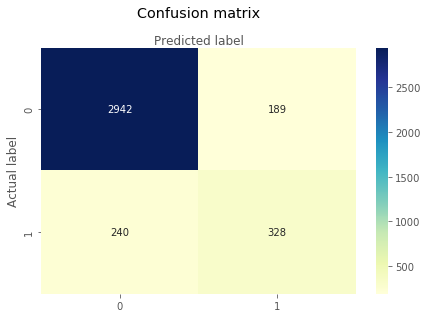

In [36]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<b> Classification report

In [37]:
# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3131
           1       0.63      0.58      0.60       568

    accuracy                           0.88      3699
   macro avg       0.78      0.76      0.77      3699
weighted avg       0.88      0.88      0.88      3699



In [38]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

<b> ROC Curve

In [39]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=logreg):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

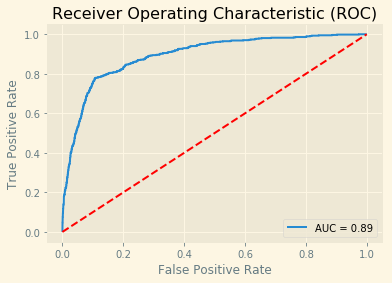

AUC score: 0.8939281649655197


In [40]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=logreg)

<a id = "800021"> <h2> 2.1 Oversampling (SMOTE) </h2> </a>

In [41]:
# Define Features and Target variables
X = df_pipeline2.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline2.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

In [42]:
sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 21)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [43]:
logreg1 = LogisticRegression()

logreg1.fit(X_train_res, y_train_res)
y_pred = logreg1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80      3131
           1       0.31      0.77      0.44       568

    accuracy                           0.70      3699
   macro avg       0.63      0.73      0.62      3699
weighted avg       0.85      0.70      0.74      3699



/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


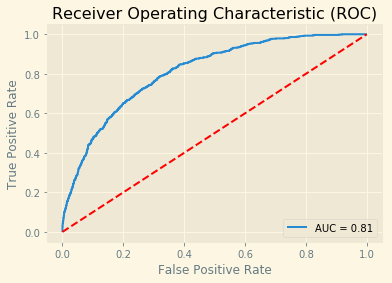

AUC score: 0.8105918326953097


In [44]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=logreg1)

<a id = "8000022"> <h2> 2.2 Cross Validation (Oversampling) </h2> </a>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<b> Accuracy

In [45]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
result = cross_val_score(logreg1, X_train_res, y_train_res, cv=kfold, scoring='accuracy')

print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Conclusion: the average of the accuracy changed after applying Kfold:')
print('--------------------------------------------------------------------------')
print('from:')
print(round(metrics.accuracy_score(y_test, y_pred), 5))
print('to:')
print(round(result.mean(), 5))
print('This is because we only use: {0:0.2f}% of our dataset to train the model!'.format(((k_fold_split-1)/k_fold_split)*100))

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.74434544 0.75599726 0.74142661 0.75034294 0.73868313 0.7441701
 0.74965706 0.73593964 0.739369   0.73251029] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.7432 

--------------------------------------------------------------------------
Conclusion: the average of the accuracy changed after applying Kfold:
--------------------------------------------------------------------------
from:
0.70181
to:
0.74324
This is because we only use: 90.00% of our dataset to train the model!


<b> Weighted F1 score

In [46]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(logreg1, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.74361847 0.75557727 0.74054337 0.74930404 0.73830058 0.74337841
 0.74924689 0.73488303 0.73866301 0.73180068] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.7425 



<b> ROC for oversampled training set (SMOTE) with cross validation (Kfold)

In [47]:
def roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=LogisticRegression(), user_defined_splits=10):
    # define two lists to write to for the true positive rate and the auc scores
    cv = StratifiedKFold(n_splits=user_defined_splits)
    tprs = []
    aucs = []
    
    # plot the line through the middle
    # Return evenly spaced numbers over a specified interval.
    mean_fpr = np.linspace(0, 1, 100)

    # set the figure and ax objects with the figure size
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # for loop to iterate over multiple folds
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    # print out the mean AUC score
    print('Mean AUC score', mean_auc)

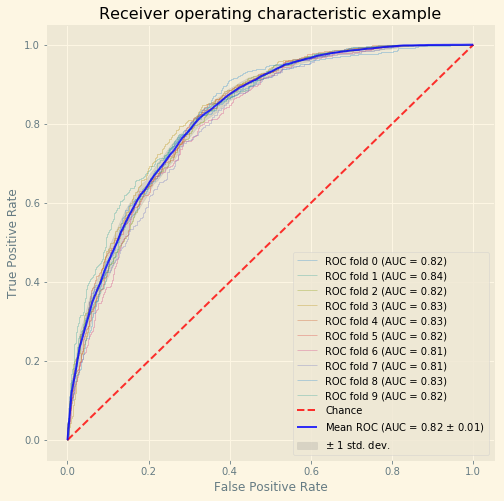

Mean AUC score 0.8218141692779496


In [48]:
# ignore warnings
warnings.filterwarnings("ignore")

# apply function to plot ROC Curve with Kfold
roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=LogisticRegression(), user_defined_splits=10)

# reset the warnings for future code
warnings.resetwarnings()

<a id = "8000023"> <h2> 2.3 Model Tuning (Hyperparameters) </h2> </a>
___
To see the hyper-parameters of the Logistic Regression model, please refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

<b> Define Grid

In [49]:
# Set the hyper-parameter grid
penalty = ['l1', 'l2']
dual=[True, False]
# syntax: numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0) => Return numbers spaced evenly on a log scale.
C = np.logspace(-4, 4, 50)
fit_intercept=[True, False]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter=[40, 50, 60, 70, 80, 90, 100, 150, 200]
multi_class = ['auto', 'ovr', 'multinomial']

param_grid = dict(penalty=penalty, 
                  dual=dual,max_iter=max_iter, 
                  C=C, 
                  fit_intercept=fit_intercept, 
                  solver=solver, 
                  multi_class=multi_class)

<b> Hyper-parameter tweaking on oversampled training set

In [50]:
# set the start time
start = time.time()

# define the model
lr = LogisticRegression()

# Create a grid search object
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_dual = grid.best_estimator_.get_params()['dual']
optimal_max_iter = grid.best_estimator_.get_params()['max_iter']
optimal_C = grid.best_estimator_.get_params()['C']
optimal_penalty = grid.best_estimator_.get_params()['penalty']
optimal_fit_intercept = grid.best_estimator_.get_params()['fit_intercept']
optimal_solver = grid.best_estimator_.get_params()['solver']
optimal_multi_class = grid.best_estimator_.get_params()['multi_class']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.868674 using {'C': 4714.8663634573895, 'dual': False, 'fit_intercept': True, 'max_iter': 40, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}
--- Execution time: ---
--- 3314009.058ms. --- 
--- 3314.00905752182 seconds ---
--- 55.23348429203033 minutes ---


/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best: 0.868674 using {'C': 4714.8663634573895, 'dual': False, 'fit_intercept': True, 'max_iter': 40, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}
<br> --- Execution time: ---
<br> --- 3314009.058ms. --- 
<br> --- 3314.00905752182 seconds ---
<br> --- 55.23348429203033 minutes ---

<b> Applying the optimal hyper-parameters on oversampled training set

In [54]:
# apply the optimal hyper-parameters to the Logistic Regression Model
logreg3 = LogisticRegression(dual=optimal_dual, 
                            max_iter=optimal_max_iter, 
                            C=optimal_C, 
                            penalty=optimal_penalty, 
                            fit_intercept=optimal_fit_intercept, 
                            solver=optimal_solver, 
                            multi_class=optimal_multi_class)

# fit/train the model with oversampled training set
logreg3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=logreg3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3131
           1       0.56      0.77      0.64       568

    accuracy                           0.87      3699
   macro avg       0.76      0.83      0.78      3699
weighted avg       0.89      0.87      0.88      3699



/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


<b> Average Weighted F1 score and Average AUC score with Cross validation

In [55]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(logreg3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(logreg3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.86635158 0.87571447 0.87517899 0.87929714 0.86059349 0.86892334
 0.85909772 0.86479502 0.85590852 0.8654295 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8671 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.92684357 0.94320027 0.92979136 0.93887336 0.93196273 0.92986939
 0.93831025 0.9333631  0.92538648 0.93134502] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9329 



<b> Cross validation on X and Y

In [56]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(logreg3, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(logreg3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(logreg3, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8941 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8906 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.9156


/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


<a id = "8000024"> <h2> 2.4 Feature Importance </h2> </a>

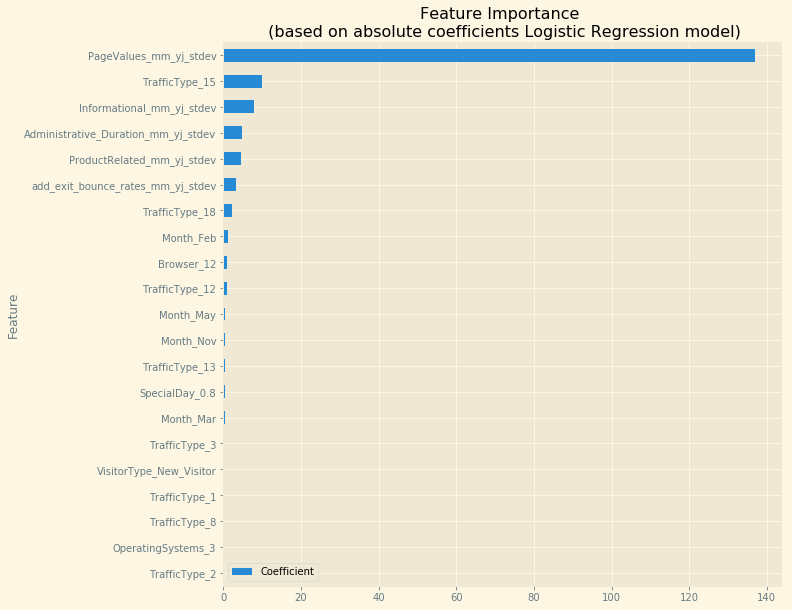

In [57]:
lst_coef=[]
lst_features=[]

for i in logreg3.coef_:
    for j in i:
        lst_coef.append(abs(j))
        
for j in list(X.columns):
        lst_features.append(j)

# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Coefficient": lst_coef}
df_coef = pd.DataFrame(dict_lists)
# sort descending and reset index
df_coef.sort_values(by=['Coefficient'],  ascending=True, inplace=True)
df_coef.reset_index(inplace=True, drop=True)
df_coef
df_coef.plot(x="Feature", y="Coefficient", kind='barh', figsize=(10,10), title='Feature Importance \n (based on absolute coefficients Logistic Regression model)')

<a id = "8020"> <h2> Pipeline 3 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [5]:
df_pipeline3 = pd.read_csv("pipeline_3.csv")

<b> show all columns in dataset

In [6]:
print('There are', len(df_pipeline3.columns)-1, 'features, and the target `Revenue` for pipeline 3:')
list(df_pipeline2.columns)

There are 23 features, and the target `Revenue` for pipeline 3:


NameError: name 'df_pipeline2' is not defined

<a id = "800030"> <h2> 3.0 Basic Model: Logistic Regression </h2> </a>

<b> Declare Features and Target

In [7]:
# Define Features and Target variables
X = df_pipeline3.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline3.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

<b> Split the data

In [8]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

<b> Model Development and Prediction

In [9]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict (y_hat) - use trained model to predict test data
y_pred=logreg.predict(X_test)

<b> Model Evaluation Using Confusion Matrix

In [10]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2962,  169],
       [ 240,  328]])

<b> Vizualizing Confusion Matrix Using Heatmap

In [11]:
%matplotlib inline
plt.style.use('ggplot')

Text(0.5,257.44,'Predicted label')

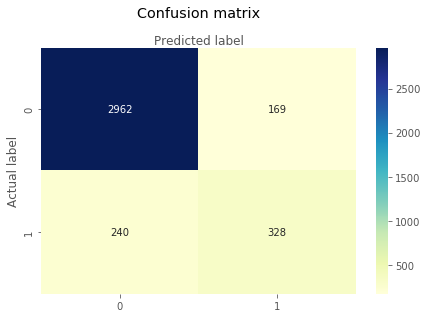

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<b> Classification report

In [13]:
# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3131
           1       0.66      0.58      0.62       568

    accuracy                           0.89      3699
   macro avg       0.79      0.76      0.78      3699
weighted avg       0.88      0.89      0.89      3699



In [14]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

<b> ROC Curve

In [15]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=logreg):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

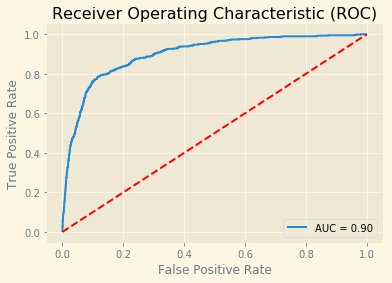

AUC score: 0.8996276445000247


In [16]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=logreg)

<a id = "800031"> <h2> 3.1 Oversampling (SMOTE) </h2> </a>

In [17]:
# Define Features and Target variables
X = df_pipeline3.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline3.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

In [18]:
sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 23)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [19]:
logreg1 = LogisticRegression()

logreg1.fit(X_train_res, y_train_res)
y_pred = logreg1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3131
           1       0.53      0.80      0.63       568

    accuracy                           0.86      3699
   macro avg       0.74      0.83      0.77      3699
weighted avg       0.89      0.86      0.87      3699



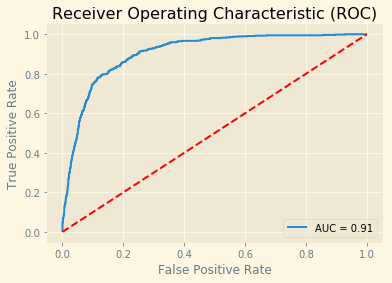

AUC score: 0.9067041983616808


In [20]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=logreg1)

<a id = "8000032"> <h2> 3.2 Cross Validation (Oversampling) </h2> </a>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<b> Accuracy

In [21]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
result = cross_val_score(logreg1, X_train_res, y_train_res, cv=kfold, scoring='accuracy')

print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Conclusion: the average of the accuracy changed after applying Kfold:')
print('--------------------------------------------------------------------------')
print('from:')
print(round(metrics.accuracy_score(y_test, y_pred), 5))
print('to:')
print(round(result.mean(), 5))
print('This is because we only use: {0:0.2f}% of our dataset to train the model!'.format(((k_fold_split-1)/k_fold_split)*100))

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.83344757 0.8601782  0.86213992 0.86762689 0.83539095 0.85390947
 0.85939643 0.85390947 0.83950617 0.85322359] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8519 

--------------------------------------------------------------------------
Conclusion: the average of the accuracy changed after applying Kfold:
--------------------------------------------------------------------------
from:
0.85861
to:
0.85187
This is because we only use: 90.00% of our dataset to train the model!


<b> Weighted F1 score

In [22]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(logreg1, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.83345555 0.86008592 0.86212038 0.86766557 0.83523816 0.85386678
 0.85926428 0.85390568 0.83947235 0.85315728] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8518 



<b> ROC for oversampled training set (SMOTE) with cross validation (Kfold)

In [23]:
def roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=LogisticRegression(), user_defined_splits=10):
    # define two lists to write to for the true positive rate and the auc scores
    cv = StratifiedKFold(n_splits=user_defined_splits)
    tprs = []
    aucs = []
    
    # plot the line through the middle
    # Return evenly spaced numbers over a specified interval.
    mean_fpr = np.linspace(0, 1, 100)

    # set the figure and ax objects with the figure size
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # for loop to iterate over multiple folds
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    # print out the mean AUC score
    print('Mean AUC score', mean_auc)

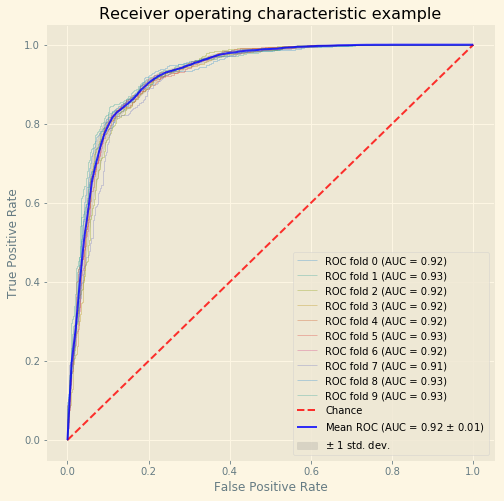

Mean AUC score 0.9244449227604986


In [24]:
# ignore warnings
warnings.filterwarnings("ignore")

# apply function to plot ROC Curve with Kfold
roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=LogisticRegression(), user_defined_splits=10)

# reset the warnings for future code
warnings.resetwarnings()

<a id = "8000033"> <h2> 3.3 Model Tuning (Hyperparameters) </h2> </a>
___
To see the hyper-parameters of the Logistic Regression model, please refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

<b> Define Grid

In [78]:
# Set the hyper-parameter grid
penalty = ['l1', 'l2']
dual=[True, False]
# syntax: numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0) => Return numbers spaced evenly on a log scale.
C = np.logspace(-4, 4, 50)
fit_intercept=[True, False]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter=[10, 40, 50, 100]
multi_class = ['auto', 'ovr', 'multinomial']

param_grid = dict(penalty=penalty, 
                  dual=dual,max_iter=max_iter, 
                  C=C, 
                  fit_intercept=fit_intercept, 
                  solver=solver, 
                  multi_class=multi_class)

<b> Hyper-parameter tweaking on oversampled training set

In [79]:
# set the start time
start = time.time()

# define the model
lr = LogisticRegression()

# Create a grid search object
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_dual = grid.best_estimator_.get_params()['dual']
optimal_max_iter = grid.best_estimator_.get_params()['max_iter']
optimal_C = grid.best_estimator_.get_params()['C']
optimal_penalty = grid.best_estimator_.get_params()['penalty']
optimal_fit_intercept = grid.best_estimator_.get_params()['fit_intercept']
optimal_solver = grid.best_estimator_.get_params()['solver']
optimal_multi_class = grid.best_estimator_.get_params()['multi_class']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.854547 using {'C': 0.0062505519252739694, 'dual': False, 'fit_intercept': True, 'max_iter': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}
--- Execution time: ---
--- 868414.111ms. --- 
--- 868.414110660553 seconds ---
--- 14.473568511009216 minutes ---


/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


<b> Applying the optimal hyper-parameters on oversampled training set

In [25]:
# Best: 0.854547 using {'C': 0.0062505519252739694, 'dual': False, 'fit_intercept': True, 'max_iter': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}
#--- Execution time: ---
#--- 868414.111ms. --- 
#--- 868.414110660553 seconds ---
#--- 14.473568511009216 minutes ---


# apply the optimal hyper-parameters to the Logistic Regression Model
#logreg3 = LogisticRegression(dual=optimal_dual, 
#                            max_iter=optimal_max_iter, 
#                            C=optimal_C, 
#                            penalty=optimal_penalty, 
#                            fit_intercept=optimal_fit_intercept, 
#                            solver=optimal_solver, 
#                            multi_class=optimal_multi_class)

logreg3 = LogisticRegression(dual=False, 
                            max_iter=10, 
                            C=0.0062505519252739694, 
                            penalty='l2', 
                            fit_intercept=True, 
                            solver='saga', 
                            multi_class='multinomial')

# fit/train the model with oversampled training set
logreg3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=logreg3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3131
           1       0.53      0.79      0.63       568

    accuracy                           0.86      3699
   macro avg       0.74      0.83      0.77      3699
weighted avg       0.89      0.86      0.87      3699



/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


<b> Average Weighted F1 score and Average AUC score with Cross validation

In [26]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(logreg3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(logreg3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.83891201 0.86070982 0.86072641 0.87040458 0.83519256 0.85860441
 0.85575468 0.85797684 0.83874043 0.8565923 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8534 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.91488578 0.93329738 0.91995549 0.93562364 0.91613354 0.9210405
 0.92940224 0.92738434 0.91595299 0.92580348] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9239 



<b> Cross validation on X and Y

In [27]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(logreg3, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(logreg3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(logreg3, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.8894459  0.89001603 0.88029261 0.91148607 0.89387695 0.90060235
 0.89136015 0.88088811 0.89507029 0.90087893] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8934 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.91488578 0.93329738 0.91995549 0.93562364 0.91613354 0.9210405
 0.92940224 0.92738434 0.91595299 0.92580348] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9239 



<a id = "8000034"> <h2> 3.4 Feature Importance </h2> </a>

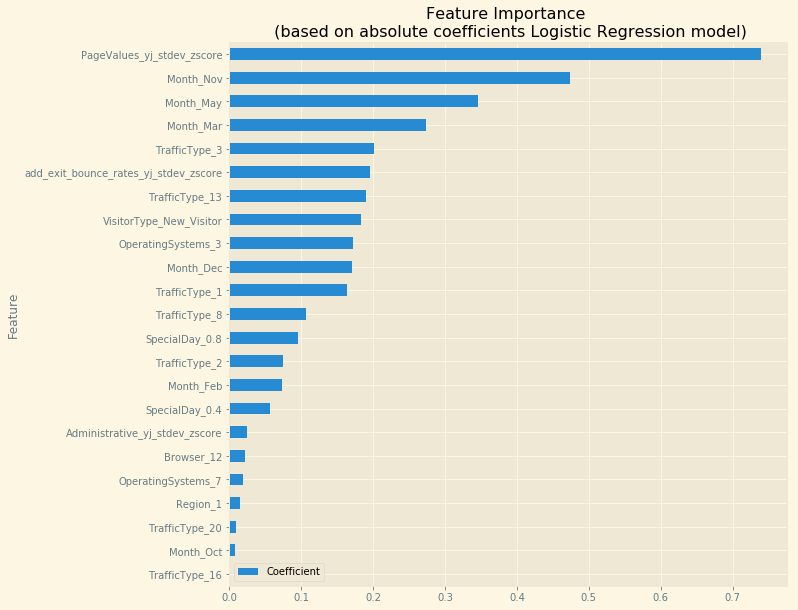

In [28]:
lst_coef=[]
lst_features=[]

for i in logreg3.coef_:
    for j in i:
        lst_coef.append(abs(j))
        
for j in list(X.columns):
        lst_features.append(j)

# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Coefficient": lst_coef}
df_coef = pd.DataFrame(dict_lists)
# sort descending and reset index
df_coef.sort_values(by=['Coefficient'],  ascending=True, inplace=True)
df_coef.reset_index(inplace=True, drop=True)
df_coef
df_coef.plot(x="Feature", y="Coefficient", kind='barh', figsize=(10,10), title='Feature Importance \n (based on absolute coefficients Logistic Regression model)')

<a id = "800004"> <h2> Results </h2> </a>

<b> Left align all markdown tables

In [84]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

### Pipeline 1 Results </b>
_Note:_ tool used for Excel table to markdown conversion, namely: https://tableconvert.com/

| **Model**                                                         | **weighted avg F1-score** | **AUC score** |
|  -----------------------------------------------------------------|:-------------------------:|:-------------:|
| Basic Model 70 Training set, 30% Test Set                         | 0\.880                    | 0\.894        |
| Oversampled 70% Training Set, 30% Test Set  \(SMOTE\)             | 0\.870                    | 0\.900        |
| Cross validation Oversampled 70% training set \(KFold = 10\)      | 0\.850                    | 0\.917        |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. and Oversampling\) | 0\.851                    | 0\.917        |
| Cross validation X, y with Optimal Hyper\-parameters \(Kfold=10\) | 0\.890                    | 0\.901        |

### Pipeline 2 Results </b>

| **Model**                                                         | **weighted avg F1-score** | **AUC score** |
|  -----------------------------------------------------------------|:-------------------------:|:-------------:|
| Basic Model 70 Training set, 30% Test Set                         | 0\.880                    | 0\.894        |
| Oversampled 70% Training Set, 30% Test Set  \(SMOTE\)             | 0\.740                    | 0\.811        |
| Cross validation Oversampled 70% training set \(KFold = 10\)      | 0\.743                    | 0\.822        |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. and Oversampling\) | 0\.867                    | 0\.933        |
| Cross validation X, y with Optimal Hyper\-parameters \(Kfold=10\) | 0\.891                    | 0\.916        |

<b> Take-away: </b> For pipeline 2 the best results are with training our model with oversampling using SMOTE and applying cross-validation for a more reliable result.

### Pipeline 3 Results </b>

| **Model**                                                         | **weighted avg F1-score** | **AUC score** |
| ----------------------------------------------------------------- |:-------------------------:|:-------------:|
| Basic Model 70 Training set, 30% Test Set                         | 0\.890                    | 0\.900        |
| Oversampled 70% Training Set, 30% Test Set  \(SMOTE\)             | 0\.870                    | 0\.907        |
| Cross validation Oversampled 70% training set \(KFold = 10\)      | 0\.852                    | 0\.924        |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. and Oversampling\) | 0\.849                    | 0\.924        |
| Cross validation X, y with Optimal Hyper\-parameters \(Kfold=10\) | 0\.893                    | 0\.911        |



<b> Conclusion: </b> 
<br> Pipelines have very similar results for the best model with cross validation using oversampling (SMOTE) and the 'optimal' parameters for the linear model, based on the weighted avg F1-score and AUC score.
<br> The variation in the feature: <b> 'Pagevalues' </b>, is for all pipelines the most important feature in predicting the variation in the target variable <b> 'Revenue' </b>, by looking at the magnitude of the coefficients.